In [18]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
plt.figure(figsize=(20,20))
%matplotlib inline

In [7]:
data = pd.read_csv('Diet_R.csv')

In [8]:
data.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


In [10]:
# Xem thông tin dữ liệu trong df

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        78 non-null     object 
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
 7   losingweight  78 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.0+ KB


Tính cân nặng giảm

In [9]:
data['losingweight'] = data['pre.weight'] - data['weight6weeks']

data_diet_losing = data[['Diet','losingweight']].copy()
data_diet_losing

,Diet,losingweight
0,2,0.0
1,2,0.0
2,1,3.8
3,1,6.0
4,1,0.7
...,...,...
73,3,2.8
74,3,4.1
75,3,5.3
76,3,9.2


**SỰ KHÁC NHAU VỀ HIỆU QUẢ CÁC PHƯƠNG PHÁP GIẢM CÂN**

**Phát biểu thống kê**

H0: không có sự khác biệt về hiệu quả giảm cân giữa 3 phương pháp

H1: có ít nhất hai kiểu phương pháp khác nhau về hiệu quả giảm cân


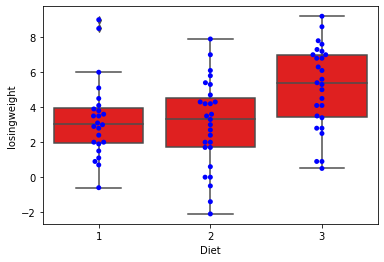

In [21]:
sns.boxplot(x='Diet',y='losingweight',data = data_diet_losing, color='red')
sns.swarmplot(x='Diet',y='losingweight', data = data_diet_losing, color='blue')
plt.show()

In [15]:
model = ols('losingweight ~ C(Diet)', data=data_diet_losing).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.093689,2.0,6.197447,0.003229
Residual,430.179259,75.0,NaN,NaN


In [16]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [17]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,6.197447,0.003229,Chấp nhận H1 với mức ý nghĩa 0.05


**Kiểm tra hậu nghiệm**

In [20]:
tukey = pairwise_tukeyhsd(endog=data_diet_losing['losingweight'],
                         groups=data_diet_losing['Diet'],
                         alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.2741,0.9,-1.8806,1.3325,False
1,3,1.8481,0.0201,0.2416,3.4547,True
2,3,2.1222,0.0048,0.5636,3.6808,True


**Kiểm tra các điều kiện cho kiểm định Anova**

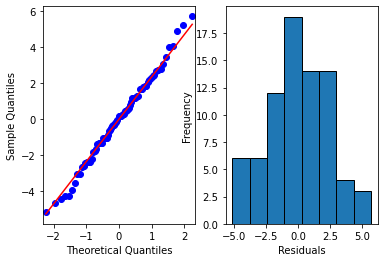

In [22]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [23]:
p_v = stats.shapiro(model.resid)[1]

**Kiểm tra sự phân phối chuẩn**

In [24]:
print('''Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn


In [26]:
data_gen_losingweight = data[['gender','losingweight']].copy()
data_gen_losingweight = data_gen_losingweight.replace(r'^\s*$', np.nan, regex=True)

data_gen_losingweight = data_gen_losingweight.dropna()

data_gen_losingweight

,gender,losingweight
2,0,3.8
3,0,6.0
4,0,0.7
5,0,2.9
6,0,2.8
...,...,...
73,1,2.8
74,1,4.1
75,1,5.3
76,1,9.2


**SỰ KHÁC NHAU VỀ HIỆU QUẢ GIẢM CÂN VỚI CÁC GIỚI TÍNH KHÁC NHAU**

**Phát biểu giải thuyết thống kê**

H0: không có sự khác biệt về hiệu quả giảm cân đối với các giới tính khác nhau

H1: Các giới khác nhau về hiệu quả giảm cân

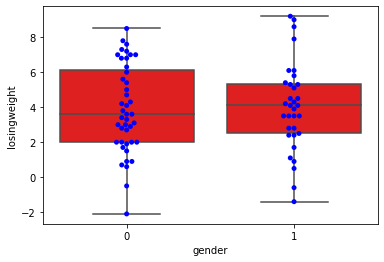

In [27]:
sns.boxplot(x='gender',y='losingweight',data = data_gen_losingweight, color='red')
sns.swarmplot(x='gender',y='losingweight', data = data_gen_losingweight, color='blue')
plt.show()

In [30]:
model_2 = ols('losingweight ~ C(gender)', data=data_gen_losingweight).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


In [31]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,0.043786,0.834827,Chấp nhận H0 với mức ý nghĩa 0.05


**Không cần tiến hành kiểm tra hậu nghiệm**

**Kiểm tra các điều kiện cho kiểm định Anova**

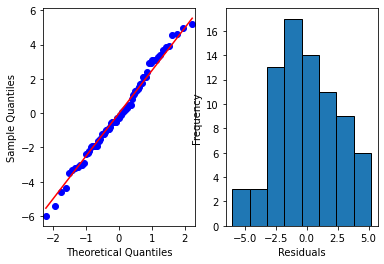

In [32]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model_2.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model_2.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [33]:
p_v = stats.shapiro(model_2.resid)[1]

In [34]:
print('''Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn
